# filter the dataset

In [ ]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def filter_dataset(file_path):
    data = pd.read_csv(file_path)  # Read the preprocessed dataset into a DataFrame
    filtered_data = data[data.iloc[:, 0].fillna("").astype(str).str.startswith("AVOC1")]  # Filter based on the first column
    
    return filtered_data

# Example usage
dataset_path = "Preprocessed_dataset.csv"  # Replace with the path to your preprocessed dataset file
filtered_df = filter_dataset(dataset_path)

print(filtered_df)

# remove the coulms with 0 value

In [ ]:
filtered_df = filtered_df.loc[:, (filtered_df != 0).any(axis=0)]

print(filtered_df)

# identify the most important features

In [ ]:
import pandas as pd

def calculate_correlation(filtered_df):
    correlation_matrix = filtered_df.corr(method='pearson')
    return correlation_matrix

correlation_matrix = calculate_correlation(filtered_df)

# Exclude diagonal (self-correlations) and select the maximum absolute correlation value
max_abs_correlation = correlation_matrix.abs().stack().drop_duplicates().dropna().sort_values(ascending=False)

# Get the most important feature
most_important_feature = max_abs_correlation.index[0]
highest_correlation_score = max_abs_correlation[0]

# Get two more effective features
additional_features = max_abs_correlation.index[1:3]

print("Most important feature:")
print(most_important_feature)
print("Correlation score:")
print(highest_correlation_score)
print("Additional effective features:")
for feature in additional_features:
    print(feature)



# pearson correlation

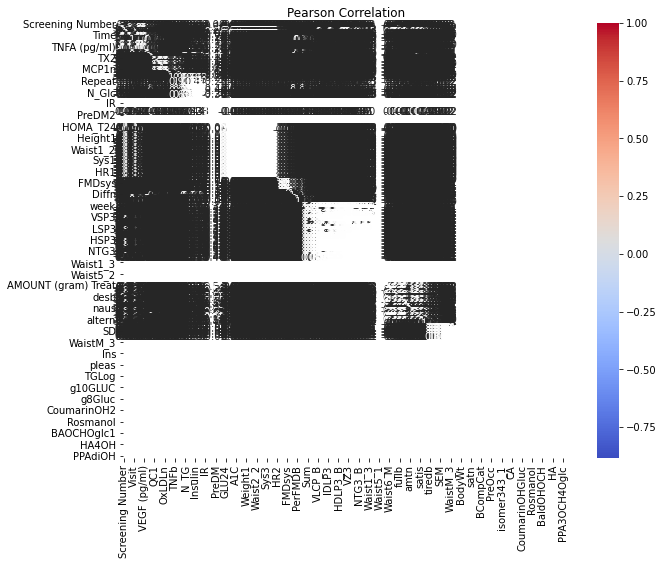

In [16]:
def calculate_correlation(filtered_df):
    correlation_matrix = filtered_df.corr(method='pearson')
    return correlation_matrix

def plot_correlation(correlation_matrix):
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title("Pearson Correlation")
    plt.show()
correlation_matrix = calculate_correlation(filtered_df)
plot_correlation(correlation_matrix)
